# Comparison of Classification methods with Visualisation

Author: Dr. Vijesh J. Bhute   

Highlights of this notebook:
<ul><li>Visualisation of predictions in a 2D space. </li>
    <li>Using cross validation methods.</li>

<b>Types of classification models:</b>
<ul><li>Logistical regression</li>
    <li>K-Nearest Neighbours</li>
    <li>Support vector machine (SVM)</li>
    <li>Kernel SVM</li>
    <li>Naive Bayes</li>
    <li>Decision Tree</li>
    <li>Random Forest</li>
    </ul> 

## Accuracy and Confusion matrix for classification models

For classification problems, accuracy for the model is given by, $$\text{Accuracy} =\frac{\text{TN+TP}}{\text{TN+FN+TP+FP}}$$ 

You can also look at the confusion matrix to see a summary of how the model has performed:
<table>
  <tr>
    <td></td>
    <th>Predicted No ($0$)</th>
    <th>Predicted Yes ($1$)</th>
  </tr>
  <tr>
    <th>Actual No ($0$)</th>
    <td>TN</td>
    <td>FP</td>
  </tr>
  <tr>
    <th>Actual Yes ($1$)</th>
    <td>FN</td>
    <td>TP</td>
  </tr>
</table>

### Importing the libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Importing the dataset

I am going to use a dataset which has 2 features. This is primarily to visualise and compare different models and what they are doing.  

In [44]:
dataset = pd.read_csv('data/Social_Network_Ads.csv') #2 features dataset
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<ul><li>Last column is a binary variable (0 for not purchased and 1 for purchased). Therefore, we will not require further encoding using Label Encoder.</li></ul>

In [45]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<b>Note:</b> The predictors/features are of similar orders of magnitude. If they were different, then it would have been important to perform feature scaling (especially since the following models will relate to classification based on these features and there isn't any explicit relationship between $y$ and $x$). 
<br>
In this case, it is also fine to do the feature scaling as it will ensure that all features have similar average and standard deviation<br>

### Feature Scaling (Optional)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #Fit using training set and transform the test set

We don't need to perform scaling for the target $y$ as it is already in $0-1$ range

### Visualising the results (Valid for 2 features only!!)

Similar plot can be built for test set to visualise the result. Usually confusion matrix and accuracy are sufficient metrics and visualising (especially for large dataset) is not recommended. This visualisation shows the classification boundary. 

In [48]:
def plotContour(modelName, X_train, y_train, X_test, y_test, scaling):
    plt.rcParams["figure.figsize"] = (10,4)
    from matplotlib.colors import ListedColormap
    
    if scaling == True:
        #Axes will need to be converted to what we can interpret if the data is scaled. 
        X_set_train, y_set_train = sc.inverse_transform(X_train), y_train
        X_set_test, y_set_test = sc.inverse_transform(X_test), y_test
    else:
        X_set_train, y_set_train = X_train, y_train
        X_set_test, y_set_test = X_test, y_test
    
    X1, X2 = np.meshgrid(np.arange(start = X_set_train[:, 0].min() - 10, stop = X_set_train[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set_train[:, 1].min() - 1000, stop = X_set_train[:, 1].max() + 1000, step = 100))
    #Above step is very time consuming. Plotting this will take some runtime. 
    plt.subplot(1,2,1)
    
    if scaling == True:
        #Axes will need to be converted to what we can interpret if the data is scaled. 
        predict = modelName.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
    else:
        predict = modelName.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    
    plt.contourf(X1, X2, predict, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.title('Training Set')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(),X2.max())
    for i, j in enumerate(np.unique(y_set_train)):
        plt.scatter(X_set_train[y_set_train == j, 0], X_set_train[y_set_train == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j,edgecolors='black')
    plt.legend()
    plt.subplot(1,2,2)
    plt.contourf(X1, X2, predict, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.title('Test Set')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(),X2.max())
    for i, j in enumerate(np.unique(y_set_test)):
        plt.scatter(X_set_test[y_set_test == j, 0], X_set_test[y_set_test == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j,edgecolors='black')
    plt.legend()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.94,
                    wspace=0.4,
                    hspace=0.4)

## Logistic Regression

Multiple linear regression model is given by, $$ y = b_0 + b_1 *x_1 + b_2 *x_2$$
<br>In logistic regression, you fit a function which lies in $0-1$. For example, sigmoid function, which is given by, $$p = \frac{1}{1+e^{-y}}$$
<br> Where $p$ is the probability which takes the values between $0$ and $1$. Solving above equation for $y$, we get, $$y = \ln \Big(\frac{p}{1-p}\Big) = b_0 + b_1*x_1 + b_2*x_2$$

### Training the Logistic Regression model on the Training set

In [73]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(random_state = 0)
logModel.fit(X_train, y_train)
#y_predict_test= logModel.predict(X_test) #Predicting test set
#print(logModel.predict(sc.transform([[30,87000]]))) #Predicting a new result using the model
#logModel.score(X_train, y_train) #Getting accuracy for the classification model 

from sklearn.metrics import confusion_matrix #Confusion matrix
y_predict = logModel.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[74  5]
 [11 30]]


<b>Call below function only when you have two features</b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

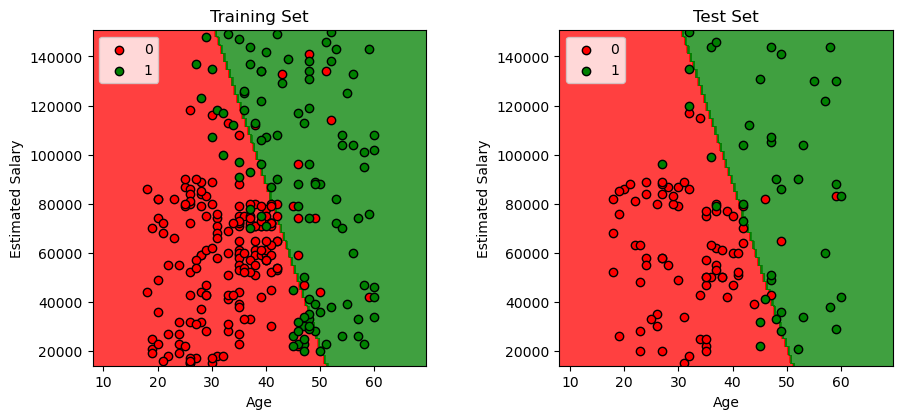

In [10]:
plotContour(logModel, X_train, y_train, X_test, y_test, True)

## K Nearest Neighbours

In [74]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski',p=2) #minkowski with p=2 corresponds to Euclidean distance
kNN.fit(X_train, y_train)
y_predict = kNN.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[73  6]
 [ 4 37]]


C:\Users\vbhute\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<b>Call below function only when you have two features</b>

C:\Users\vbhute\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its

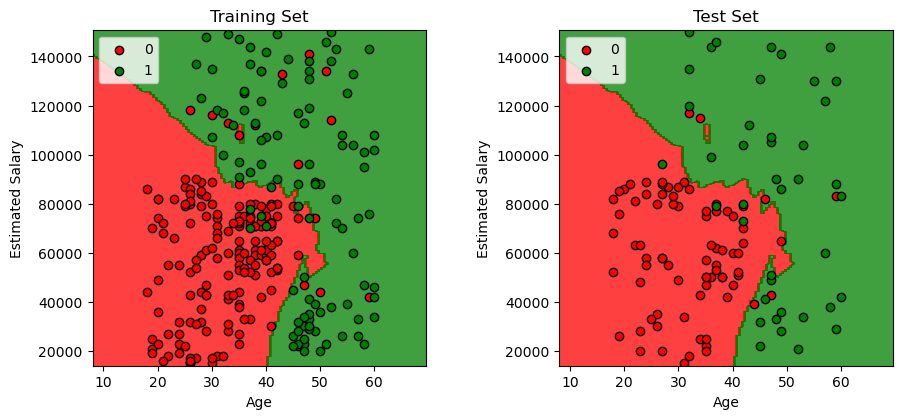

In [14]:
plotContour(kNN, X_train, y_train, X_test, y_test, True)

## Support Vector Machine (SVM)

### Linear kernel for SVM

In [53]:
from sklearn.svm import SVC
LinearSVMmodel = SVC(kernel='linear', random_state = 0)
LinearSVMmodel.fit(X_train, y_train)
y_predict = LinearSVMmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[75  4]
 [12 29]]


<b>Call below function only when you have two features</b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

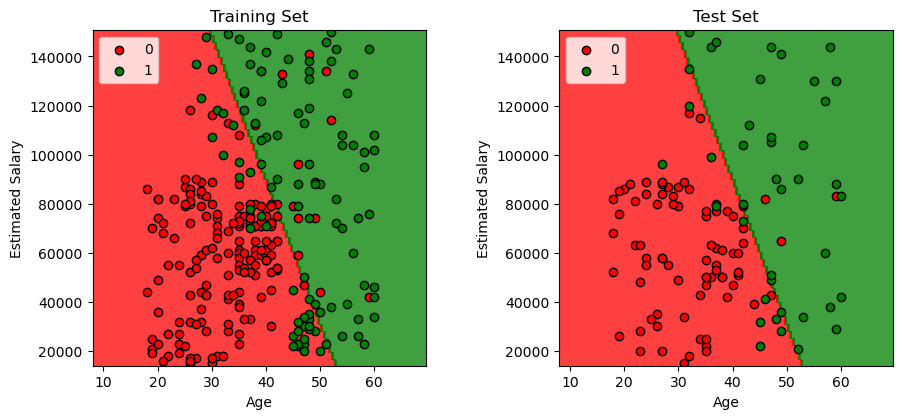

In [17]:
plotContour(LinearSVMmodel, X_train, y_train, X_test, y_test, True)

### Cross validation

Trying out cross validation on scaled data by splitting data into multiple training and test sets. It is important to perform scaling of the corresponding training set. This is done using <i>pipeline</i> method in scikit learn. You can learn more about cross-validation from <a href="https://scikit-learn.org/stable/modules/cross_validation.html" target="_blank">scikit learn website</a>

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, ShuffleSplit, cross_val_predict
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) #k-fold Cross-validation. In this example, k = 5
LinearSVMmodel2 = make_pipeline(StandardScaler(), SVC(C=1, kernel ='linear'))  
#C is the regularisation parameter and its default value is 1
#Above step ensures that the training set is standardised and same scaler is used for the test set
scores = cross_val_score(LinearSVMmodel2, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.83 accuracy with a standard deviation of 0.02


### Kernel SVM

Types of common kernel functions:<br>
<ul><li>Gaussian Radial basis function (RBF)</li>
    <li>Sigmoid kernel </li>
    <li>Polynomial kernel</li>
    </ul>

In [54]:
from sklearn.svm import SVC
kSVMmodel = SVC() #default kernel is rbf (radial basis function)
#Other kernels include 'linear', ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or callable, default=’rbf’
kSVMmodel.fit(X_train, y_train)
y_predict = kSVMmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[72  7]
 [ 4 37]]


<b>Call below function only when you have two features</b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

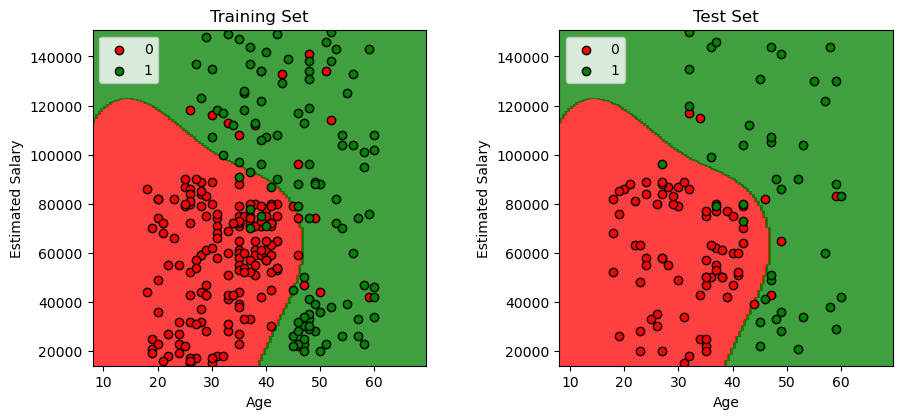

In [22]:
plotContour(kSVMmodel, X_train, y_train, X_test, y_test, True)

### Cross validation

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) #k-fold Cross-validation. In this example, k = 5
clf = make_pipeline(StandardScaler(), SVC(C=1, kernel ='rbf'))  
#C is the regularisation parameter and its default value is 1
#Above step ensures that the training set is standardised and same scaler is used for the test set
scores = cross_val_score(clf, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.01


## Naive Bayes

<ul><li>Naive Bayes makes several assumptions but can be used even if the dataset don't satisfy these assumptions. </li><li>The most important assumption is that the <b>features are linearly independent of each other</b>. This is not true in most cases.</li> <li>
In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. </li>
    <li><b>This algorithm is good for classification but very good for estimation!</b></li>
<li>There are different types of Naive Bayes classifiers which differ mainly by the assumptions they make regarding the distribution of $P(x_i | y)$. These are:
<ul><li> Gaussian Naive Bayes</li>
    <li> Multinomial Naive Bayes </li>
    <li> Complement Naive Bayes</li>
    <li> Bernoulli Naive Bayes</li>
    <li> Categorical Naive Bayes </li></ul></li></ul>
You can learn more about Naive Bayes classifier from <a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">scikit learn website</a> <br>

### Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB #MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
NBmodel = GaussianNB()
NBmodel.fit(X_train,y_train)
y_predict = NBmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[74  5]
 [ 8 33]]


<b>Call below function only when you have two features</b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

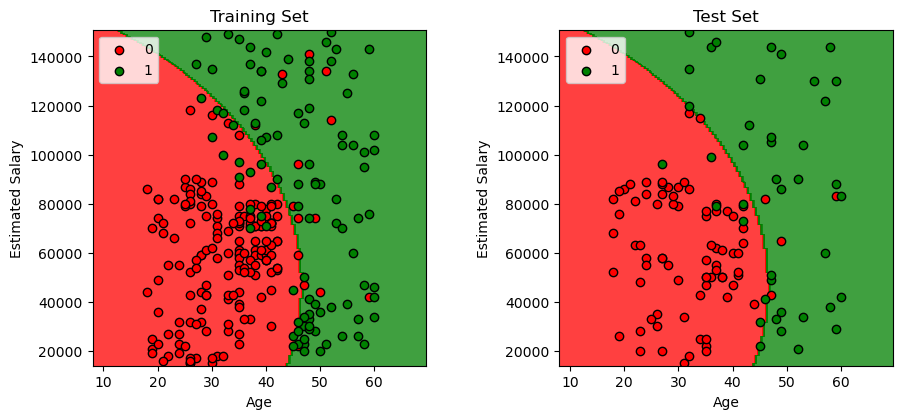

In [36]:
plotContour(NBmodel, X_train, y_train, X_test, y_test, True)

### Decision Trees classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
DecTreeModel= DecisionTreeClassifier()
DecTreeModel.fit(X_train,y_train)
y_predict = DecTreeModel.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[70  9]
 [ 7 34]]


<b>Call below function only when you have two features</b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

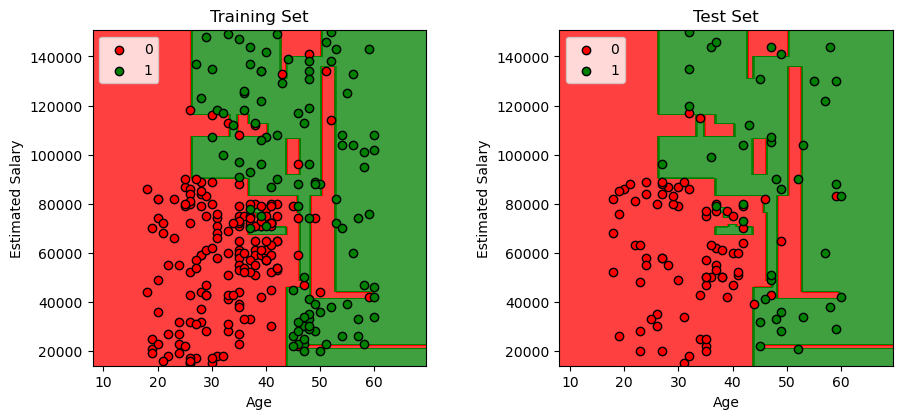

In [38]:
plotContour(DecTreeModel, X_train, y_train, X_test, y_test, True)

## Random Forests classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RFModel.fit(X_train, y_train)
y_predict = RFModel.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[72  7]
 [ 5 36]]


<b>Call below function only when you have two features</b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

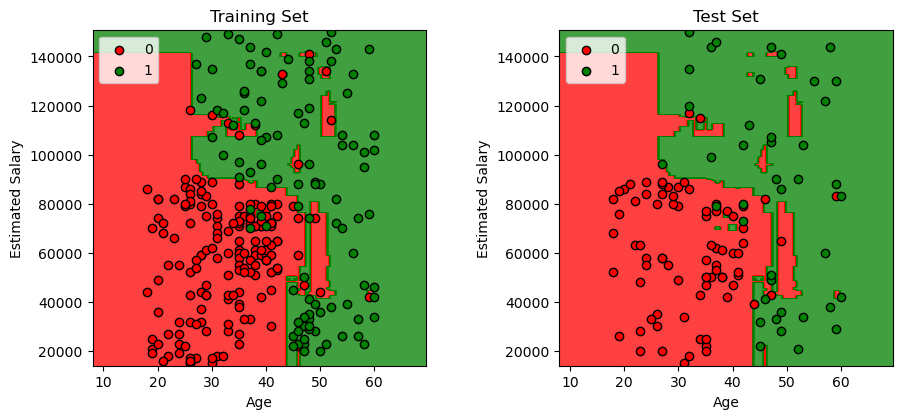

In [40]:
plotContour(RFModel, X_train, y_train, X_test, y_test, True)

## Model comparison

In [64]:
dat = {'Model name':['Log Regression', 'kNN', 
                     'Linear SVM', 'Kernel SVM', 
                     'Naive Bayes', 'Decision Trees', 
                     'Random Forests'], 
       'Training set':[logModel.score(X_train, y_train), kNN.score(X_train, y_train), 
                       LinearSVMmodel.score(X_train,y_train), kSVMmodel.score(X_train,y_train), 
                      NBmodel.score(X_train,y_train), DecTreeModel.score(X_train, y_train),
                      RFModel.score(X_train,y_train)], 
       'Test set':[logModel.score(X_test, y_test), kNN.score(X_test,y_test), 
                   LinearSVMmodel.score(X_test,y_test), kSVMmodel.score(X_test,y_test), 
                  NBmodel.score(X_test,y_test), DecTreeModel.score(X_test, y_test),
                  RFModel.score(X_test,y_test)]}
accuracyDF = pd.DataFrame(data = dat)
#accuracy[0]= logModel.score(X_train, y_train)
#accuracyTest
accuracyDF

C:\Users\vbhute\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vbhute\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

,Model name,Training set,Test set
0,Log Regression,0.832143,0.866667
1,kNN,0.921429,0.916667
2,Linear SVM,0.828571,0.866667
3,Kernel SVM,0.917857,0.908333
4,Naive Bayes,0.885714,0.891667
5,Decision Trees,1.000000,0.866667
6,Random Forests,1.000000,0.900000


For this dataset, with default parameters, kNN and Kernel SVM perform better than other classifier models based on accuracy. Accuracy may not be the best metric (accuracy paradox can be an issue). Cumulative Accuracy Profile can be compared for different models to get a better metric for comparison of classification models. 